# Recyler Data Plots

In [184]:
# The way the files are strucutred is that we have different data point based on booster turns. 
# For each data point, we get data 3 times.
# Data is organized as number_of_turns_00N where N is 0,1,2 
# For each data point. We measure the intensity and intrabunch motion using a scope. 

In [185]:
import numpy as np
import matplotlib.pyplot as plt

In [186]:
# this is the intensity file. It shows the beam intensity verses time in our event ($E1)
turn800Beam = np.loadtxt(r'summerIntern\8turns0_beam')

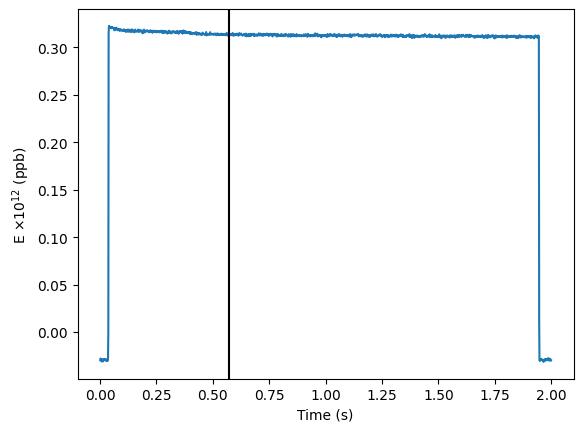

In [187]:
plt.plot(turn800Beam[0:,0],turn800Beam[0:,1])
plt.xlabel(r'Time (s)')
plt.ylabel(r'E $\times 10^{12}$ (ppb)')
plt.axvline(0.57,c='k')
# the vertical line represent were the scope data is taken

In [188]:
turn800 = np.load(r'summerIntern\coherent_tune_shift\8turns000.npy',allow_pickle=True)

print (f'There are {turn800.shape[0]} channels in the data. Each channel represent data from {turn800.shape[1]} turns and each turn has {turn800.shape[2]} point')

There are 2 channels in the data. Each channel represent data from 10000 turns and each turn has 7500 point


In [189]:
time_along_bunch = np.linspace(-0.75e-7,0.75e-7,7500)
position = turn800[0]/-1*turn800[1]

Text(0, 0.5, 'A-B/A+B (Distance)')

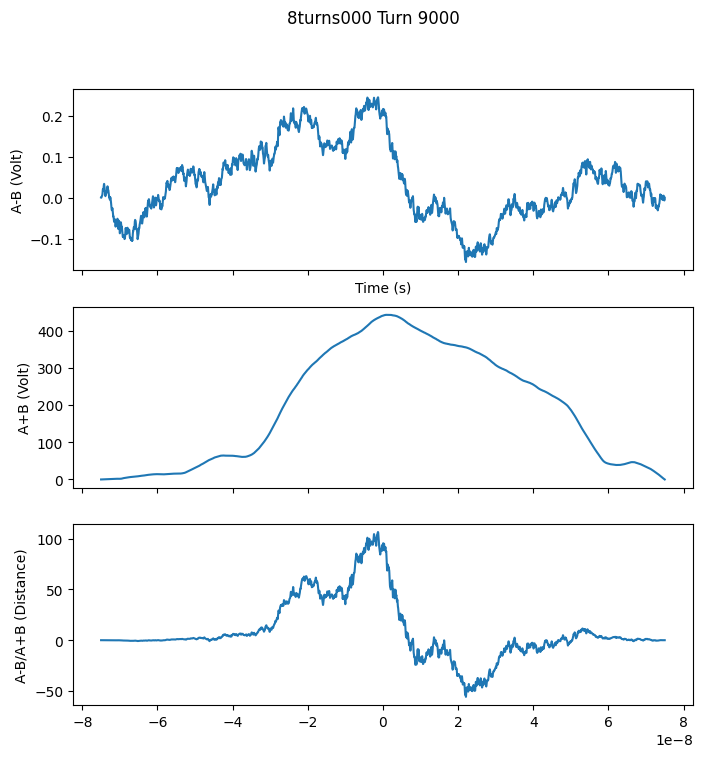

In [190]:
fig,ax = plt.subplots(3,1,dpi=100,sharex=True, figsize=(8,8))
fig.suptitle('8turns000 Turn 9000')
ax[0].plot(time_along_bunch,turn800[0][9000])
ax[1].plot(time_along_bunch,-1*turn800[1][9000])
ax[2].plot(time_along_bunch,position[9000])
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('A-B (Volt)')
ax[1].set_ylabel('A+B (Volt)')
ax[2].set_ylabel('A-B/A+B (Distance)')

Text(0, 0.5, 'Position')

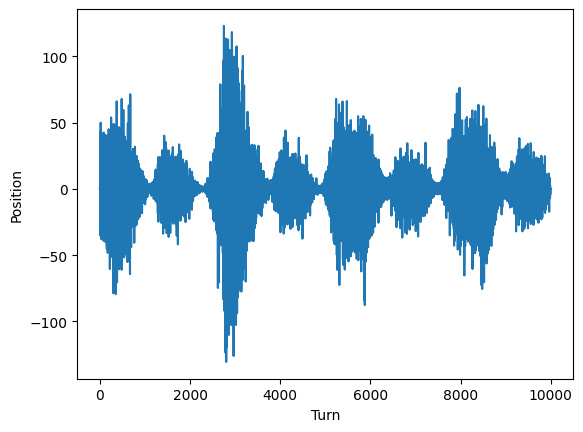

In [195]:
# Find position at a given time for each turn
time = 6e-8
time_index = np.argmin(np.abs(time_along_bunch - time))
plt.plot(position[:, time_index])
plt.xlabel('Turn')
plt.ylabel('Position')

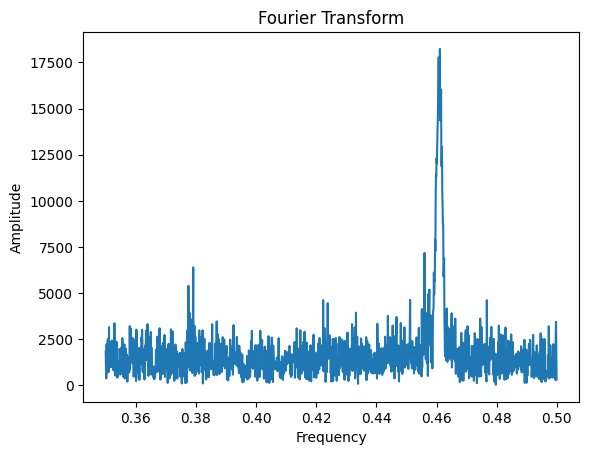

In [196]:
# Fourier transform the data
fourier = np.fft.fft(position[:, time_index])

# Frequency domain
freq = np.fft.fftfreq(len(position[:, time_index]))
mask = freq>0.35


# Plotting
plt.plot(freq[mask], np.abs(fourier[mask]))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Fourier Transform')
plt.show()